# Exercício 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Perceptron
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.special import expit
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import classification_report

In [2]:
# Number of examples.
N = 1000

centers = [[-0.5, 0], [0, 1.5]]
X, y = make_blobs(n_samples=N, centers=centers, random_state=42)

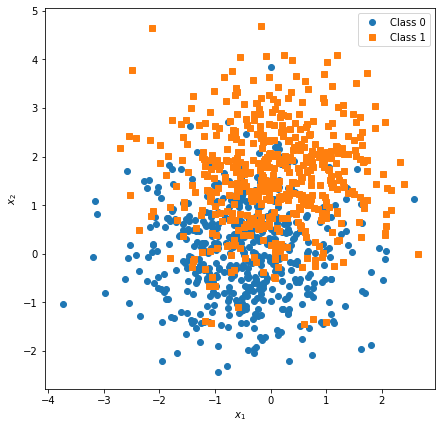

In [3]:
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)

fig = plt.figure(figsize=(7,7))
plt.plot(X[idx0,0], X[idx0,1], 'o', label='Class 0')
plt.plot(X[idx1,0], X[idx1,1], 's', label='Class 1')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()

In [4]:
# Train and Predict
per = Perceptron(random_state=42)
per.fit(X, y)

y_pred = per.predict(X)
        

In [5]:
# Calculate and return the accuracy on the test data
accuracy = accuracy_score(y, y_pred)
print('Accuracy: ',accuracy)


Accuracy:  0.762


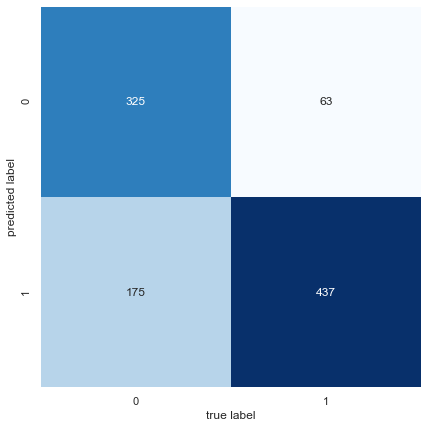

In [6]:
# Plot the confusion matrix
fig = plt.figure(figsize=(7, 7))
mat = confusion_matrix(y, y_pred)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

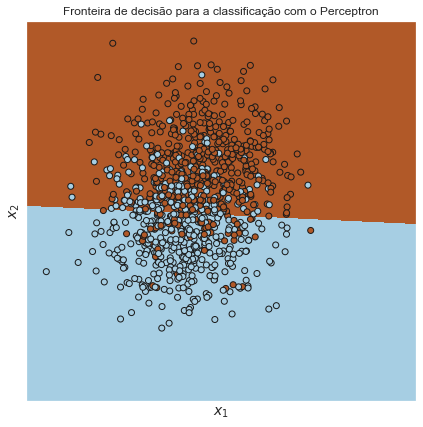

In [7]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X.min() - .5, X.max() + .5
y_min, y_max = X.min() - .5, X.max() + .5
h = .002  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#Z = per.predict(np.c_[np.ones((len(xx.ravel()), 1)), xx.ravel(), yy.ravel()])
Z = per.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(7, 7))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
#plt.scatter(x1, x2, c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.title('Fronteira de decisão para a classificação com o Perceptron')
plt.show()

In [8]:
# Train and Predict
per = LogisticRegression(solver='lbfgs', random_state=42)
per.fit(X, y)

y_pred = per.predict(X)

In [9]:
# Calculate and return the accuracy on the test data
accuracy = accuracy_score(y, y_pred)
print('accuracy: ',accuracy)

accuracy:  0.797


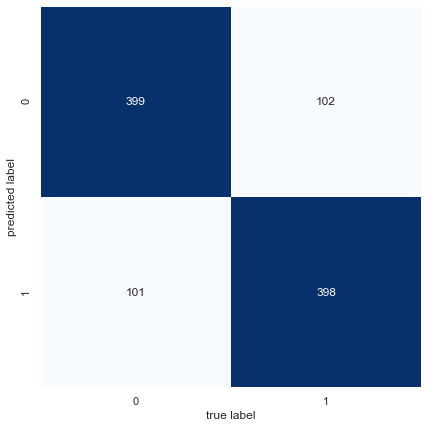

In [10]:
# Plot the confusion matrix
fig = plt.figure(figsize=(7, 7))
mat = confusion_matrix(y, y_pred)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

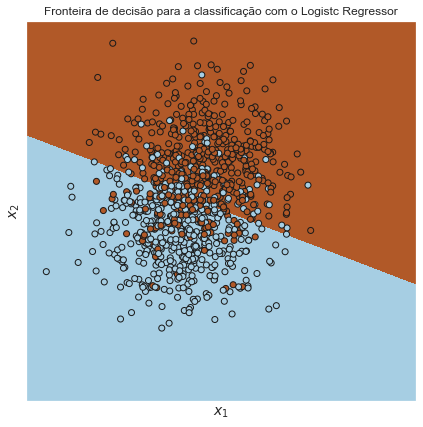

In [11]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X.min() - .5, X.max() + .5
y_min, y_max = X.min() - .5, X.max() + .5
h = .002  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#Z = per.predict(np.c_[np.ones((len(xx.ravel()), 1)), xx.ravel(), yy.ravel()])
Z = per.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(7, 7))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
#plt.scatter(x1, x2, c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.title('Fronteira de decisão para a classificação com o Logistc Regressor')
plt.show()

## Resposta

De acordo com os valores obtidos, pode-se concluir que o classificador de regressão logística apresentou um desempenho melhor em relação ao classificador perceptron. Este resultado é devido ao fato de que o classiicador perceptron converge apenas quando o conjunto de dados é linearmente sepearável. Além disso, o perceptron, ao contrário do classificador de regressão logística, não produz como saída uma probabilidade de classe, ou seja, apenas faz a predição com base em um limiar rígido (0 ou 1).